## Analyse factorielle en python à l'aide du package factor_analyzer, sklearn et fanalysis
Importer les bibliothèques requises

## factor_analyzer 

In [1]:
# Import required libraries
import pandas as pd
from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer
from fanalysis.ca import CA
import numpy as np
%matplotlib inline

## Chargement et nettoyage de donnée

In [2]:
df = pd.read_excel("prixnobel.xlsx")
df

,Pays,Economie,Littérature,Medecine,Paix,Physique,Marge Colonne
0,Allemagne,1,8,18,5,24,56
1,Canada,3,2,4,1,4,14
2,France,3,11,12,10,9,45
3,GB,6,7,26,11,20,70
4,Italie,1,6,5,1,5,18
5,Japon,0,2,3,1,11,17
6,Russie,3,5,2,3,10,23
7,USA,43,8,70,19,66,206
8,Marge Ligne,60,49,140,51,149,449


## la préparation des données pour l'AFC

In [3]:
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_afc = df.fillna( df.mean() )

In [4]:
data_afc.head()

,Pays,Economie,Littérature,Medecine,Paix,Physique,Marge Colonne
0,Allemagne,1,8,18,5,24,56
1,Canada,3,2,4,1,4,14
2,France,3,11,12,10,9,45
3,GB,6,7,26,11,20,70
4,Italie,1,6,5,1,5,18


In [5]:
data_afc.describe()

,Economie,Littérature,Medecine,Paix,Physique,Marge Colonne
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,13.333333,10.888889,31.111111,11.333333,33.111111,99.777778
std,22.118996,14.581190,46.079943,16.062378,47.445876,143.977236
min,0.000000,2.000000,2.000000,1.000000,4.000000,14.000000
25%,1.000000,5.000000,4.000000,1.000000,9.000000,18.000000
50%,3.000000,7.000000,12.000000,5.000000,11.000000,45.000000
75%,6.000000,8.000000,26.000000,11.000000,24.000000,70.000000
max,60.000000,49.000000,140.000000,51.000000,149.000000,449.000000


In [6]:
X = data_afc.iloc[:-1, 1:-1]
# ou data.index pour avoir les intitulés
features = df.columns
names = df["Pays"] 

In [7]:
X

,Economie,Littérature,Medecine,Paix,Physique
0,1,8,18,5,24
1,3,2,4,1,4
2,3,11,12,10,9
3,6,7,26,11,20
4,1,6,5,1,5
5,0,2,3,1,11
6,3,5,2,3,10
7,43,8,70,19,66


In [8]:
data_afc.describe()

,Economie,Littérature,Medecine,Paix,Physique,Marge Colonne
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,13.333333,10.888889,31.111111,11.333333,33.111111,99.777778
std,22.118996,14.581190,46.079943,16.062378,47.445876,143.977236
min,0.000000,2.000000,2.000000,1.000000,4.000000,14.000000
25%,1.000000,5.000000,4.000000,1.000000,9.000000,18.000000
50%,3.000000,7.000000,12.000000,5.000000,11.000000,45.000000
75%,6.000000,8.000000,26.000000,11.000000,24.000000,70.000000
max,60.000000,49.000000,140.000000,51.000000,149.000000,449.000000


In [9]:
data_afc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pays           9 non-null      object
 1   Economie       9 non-null      int64 
 2   Littérature    9 non-null      int64 
 3   Medecine       9 non-null      int64 
 4   Paix           9 non-null      int64 
 5   Physique       9 non-null      int64 
 6   Marge Colonne  9 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 632.0+ bytes


## Centrage et Réduction

In [10]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [11]:
X_scaled

array([[-0.48049383,  0.64850655,  0.02341465, -0.22686441,  0.28231492],
       [-0.33264957, -1.42671441, -0.63219542, -0.8868336 , -0.76815919],
       [-0.33264957,  1.68611703, -0.2575611 ,  0.59809708, -0.50554066],
       [-0.11088319,  0.30263639,  0.39804897,  0.76308938,  0.07222009],
       [-0.48049383, -0.04323377, -0.58536613, -0.8868336 , -0.71563548],
       [-0.55441595, -1.42671441, -0.67902471, -0.8868336 , -0.40049325],
       [-0.33264957, -0.38910393, -0.725854  , -0.55684901, -0.45301696],
       [ 2.62423551,  0.64850655,  2.45853776,  2.08302777,  2.48831053]])

## Test d'adéquation

Avant d'effectuer une analyse factorielle, nous devons évaluer la **«factorabilité»** de notre ensemble de données. La **factorabilité** signifie «pouvons-nous trouver les facteurs dans l'ensemble de données?». Il existe deux méthodes pour vérifier la factorabilité ou l'adéquation de l'échantillonnage:
* Test de Bartlett 
* Test de Kaiser-Meyer-Olkin
### Test de Bartlett 
Le test de sphéricité de Bartlett vérifie si les variables observées sont intercorrélées ou non en utilisant la matrice de corrélation observée avec la matrice d'identité. Si le test est statistiquement insignifiant, nous ne devons pas procéder à une analyse factorielle.

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(X_scaled)
chi_square_value, p_value

(38.842458091821385, 1.0897653546919014e-05)

Dans ce test de Bartlett, la valeur p est sensiblement égale à 0.  Alors le test est **statistiquement significatif**, indiquant que la matrice de corrélation observée n’est pas une matrice d’identité on peut le vérifier maintenant.

## Matrice de correlation¶

In [13]:
X.corr()

,Economie,Littérature,Medecine,Paix,Physique
Economie,1.000000,0.276448,0.948944,0.836228,0.940818
Littérature,0.276448,1.000000,0.434278,0.653583,0.355096
Medecine,0.948944,0.434278,1.000000,0.918967,0.973559
Paix,0.836228,0.653583,0.918967,1.000000,0.849404
Physique,0.940818,0.355096,0.973559,0.849404,1.000000


## Test de Kaiser-Meyer-Olkin (KMO)

Pour mesurer la pertinence des données pour l'analyse factorielle. Il détermine l'adéquation pour chaque variable observée et pour le modèle complet. **KMO** estime la proportion de variance parmi toutes les variables observées. Une proportion plus faible est plus adaptée à l'analyse factorielle Les valeurs de **KMO** sont comprises entre 0 et 1. Une valeur de **KMO** inférieure à 0,6 est considérée comme inadéquate.

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_all

array([0.85687911, 0.49572496, 0.65626291, 0.66466027, 0.71193718])

In [15]:
kmo_model

0.6905912689232802

#### Le KMO global pour nos données est de **0.69**, ce qui n'est mal ici. Cette valeur indique que nous pouvons poursuivre votre analyse factorielle planifiée.

## Choix du nombre de facteurs¶

Pour choisir le nombre de facteurs, nous pouvons utiliser le Kaiser criterion et scree plot. Les deux sont basés sur des valeurs propres

In [16]:
# Créer un objet d'analyse factorielle et effectuer une analyse factorielle
fa = FactorAnalyzer()
fa = FactorAnalyzer()
fa.fit(np.array(data_afc.iloc[:, 1:]))
# Vérifier les valeurs propres
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.76165197e+00, 2.05669339e-01, 1.82729245e-02, 1.19748478e-02,
       2.43091817e-03, 7.75720840e-17])

In [17]:
## Améliorons l'affichage
valeur_propre = pd.DataFrame({
    'Valeurs propres':eigen_values
})
valeur_propre

,Valeurs propres
0,5.761652e+00
1,2.056693e-01
2,1.827292e-02
3,1.197485e-02
4,2.430918e-03
5,7.757208e-17


#### Ici, nous pouvons voir que pour 1 facteur, la valeur propre est supérieure à un. Cela signifie que nous devons choisir seulement 1 facteur (ou des variables non observées).

## Construction du model

L'exécution de la méthode  CA( row_labels=df.index.values, col_labels=df.columns.values) provoque a minima le calcul des attributs :
 * afc.eig\_ : valeurs propres
 * afc.row\_coord\_ : coordonnées des points lignes
 * afc.col\_coord\_ : coordonnées des points colonnes

In [18]:
afc = CA(n_components=4, row_labels=df.index.values, col_labels=df.columns.values)

In [19]:
afc.fit(np.array(df.iloc[:-1, 1:-1]))

CA(col_labels=array(['Pays', 'Economie', 'Littérature', 'Medecine', 'Paix', 'Physique',
       'Marge Colonne'], dtype=object),
   n_components=4, row_labels=array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64))

In [20]:
afc.eig_

array([[9.95847354e-02, 3.78082667e-02, 1.94688292e-02, 8.94717211e-03],
       [6.00599083e+01, 2.28023002e+01, 1.17417202e+01, 5.39607134e+00],
       [6.00599083e+01, 8.28622085e+01, 9.46039287e+01, 1.00000000e+02]])

In [21]:
afc.row_coord_

array([[-0.25072608, -0.24093709,  0.13853351, -0.06562215],
       [ 0.06808081,  0.08805024, -0.24265363, -0.10990216],
       [-0.48981905,  0.34006561,  0.01375679,  0.0916408 ],
       [-0.05600309,  0.09379482,  0.20017491,  0.02144546],
       [-0.61808927,  0.05643006, -0.22328308, -0.33662708],
       [-0.26858138, -0.65688755,  0.00215123,  0.12329025],
       [-0.35173633, -0.12311158, -0.35537597,  0.19716538],
       [ 0.30500499,  0.01637911, -0.03318375, -0.00477184]])

In [22]:
afc.col_coord_

array([[ 0.50648784,  0.17122169, -0.24647135,  0.0102102 ],
       [-0.72521836,  0.12449655, -0.17584245, -0.08892222],
       [ 0.11715814,  0.06416071,  0.14072891, -0.09186297],
       [-0.17686977,  0.26795174,  0.12250512,  0.20766506],
       [-0.01500236, -0.26189041, -0.0170822 ,  0.0403656 ]])

L'attribut afc.eig\_ contient :
 * en 1ère ligne : les valeurs propres en valeur absolue
 * en 2ème ligne : les valeurs propres en pourcentage de la variance totale
 * en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [23]:
afc.eig_

array([[9.95847354e-02, 3.78082667e-02, 1.94688292e-02, 8.94717211e-03],
       [6.00599083e+01, 2.28023002e+01, 1.17417202e+01, 5.39607134e+00],
       [6.00599083e+01, 8.28622085e+01, 9.46039287e+01, 1.00000000e+02]])

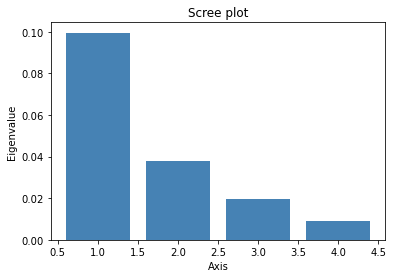

In [24]:
afc.plot_eigenvalues()

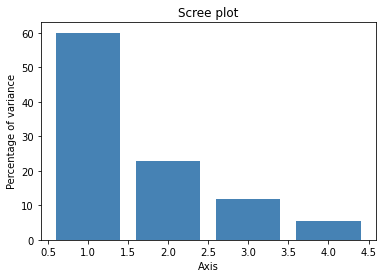

In [25]:
afc.plot_eigenvalues(type="percentage")

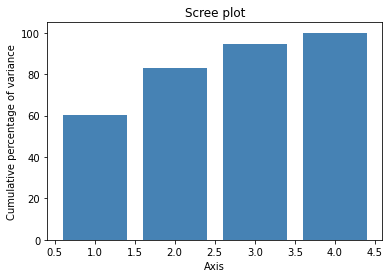

In [26]:
afc.plot_eigenvalues(type="cumulative")

Nous voyons que l'axe 1 fournit 60% de l'informatique, alors que l'axe 2 fournit à peu près 22%, l'axe 3 12% et l'axe 6%

Quand l'objet **afc** a été instancié, son paramètre stats a reçu la valeur True par défaut.
En conséquence, lors de l'exécution de la méthode afc.fit(df.iloc[:-1, 1:-1]), les statistiques suivantes ont été calculées :

 * afc.row\_contrib\_ : contributions des points lignes à la variance de l'axe
 * afc.col\_contrib\_ : contributions des points colonnes à la variance de l'axe
 * afc.row\_cos2\_ : cosinus carrés des points lignes
 * afc.col\_cos2\_ : cosinus carrés des points colonnes
 
Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il aurait fallu instancier :
afc = CA(stats=False)

Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre n_components avec par exemple :
afc = CA(n_components=3)

## Extraction des statistiques sur les points lignes

### Export de la totalité des données lignes vers une DataFrame pandas

On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points lignes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).

In [27]:
df_rows = afc.row_topandas()

In [28]:
print(df_rows)

      row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
row0       -0.250726       -0.240937        0.138534       -0.065622   
row1        0.068081        0.088050       -0.242654       -0.109902   
row2       -0.489819        0.340066        0.013757        0.091641   
row3       -0.056003        0.093795        0.200175        0.021445   
row4       -0.618089        0.056430       -0.223283       -0.336627   
row5       -0.268581       -0.656888        0.002151        0.123290   
row6       -0.351736       -0.123112       -0.355376        0.197165   
row7        0.305005        0.016379       -0.033184       -0.004772   

      row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  row_contrib_dim4  \
row0          7.873139         19.149712         12.294518          6.002840   
row1          0.145124          0.639376          9.430081          4.209286   
row2         24.145975         30.655249          0.097423          9.407150   
row3          0.491002         

In [29]:
print(df_rows.row_contrib_dim1)

row0     7.873139
row1     0.145124
row2    24.145975
row3     0.491002
row4    15.379273
row5     2.742594
row6     6.363897
row7    42.858996
Name: row_contrib_dim1, dtype: float64


In [40]:
print(df_rows.row_cos2_dim1)

row0    0.435307
row1    0.055611
row2    0.658848
row3    0.059781
row4    0.696645
row5    0.139033
row6    0.406913
row7    0.985255
Name: row_cos2_dim1, dtype: float64


Puis que l'axe 1 répresente 60% de l'information, on va se contenter d'interpreter<br> les résultats sur l'axe 1<br/>
les lignes qui ont le plus contribuer à sa construction sont :
  * row7 ( les USA ) avec  0.98
  * row4 ( l'Italie ) avec  0.70
  * row2 ( la France ) avec 0.66
  * row0 ( l'Allemagne ) avec  0.44
  * row6 ( la Russie ) avec  0.41<br>
Nous pouvons dire que pays qui ont réçu plus de prix noble dans plusieurs matières à la fois dans la base donnée qui a constitué l'objet de notre études sont les Etat-unis, la France, l'Italie, l'Allemagne et la Russie

## Extraction des statistiques sur les points colonnes

### Export de la totalité des données colonnes vers une DataFrame pandas

On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points colonnes, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).

In [30]:
df_cols = afc.col_topandas()

In [31]:
print(df_cols)

      col_coord_dim1  col_coord_dim2  col_coord_dim3  col_coord_dim4  \
col0        0.506488        0.171222       -0.246471        0.010210   
col1       -0.725218        0.124497       -0.175842       -0.088922   
col2        0.117158        0.064161        0.140729       -0.091863   
col3       -0.176870        0.267952        0.122505        0.207665   
col4       -0.015002       -0.261890       -0.017082        0.040366   

      col_contrib_dim1  col_contrib_dim2  col_contrib_dim3  col_contrib_dim4  \
col0         34.423116         10.361812         41.696343          0.155700   
col1         57.636095          4.473811         17.332347          9.644607   
col2          4.297678          3.394949         31.718199         29.408773   
col3          3.568110         21.570004          8.755732         54.747579   
col4          0.075001         60.199424          0.497379          6.043341   

      col_cos2_dim1  col_cos2_dim2  col_cos2_dim3  col_cos2_dim4  
col0       0.739921

In [32]:
print(df_cols)

      col_coord_dim1  col_coord_dim2  col_coord_dim3  col_coord_dim4  \
col0        0.506488        0.171222       -0.246471        0.010210   
col1       -0.725218        0.124497       -0.175842       -0.088922   
col2        0.117158        0.064161        0.140729       -0.091863   
col3       -0.176870        0.267952        0.122505        0.207665   
col4       -0.015002       -0.261890       -0.017082        0.040366   

      col_contrib_dim1  col_contrib_dim2  col_contrib_dim3  col_contrib_dim4  \
col0         34.423116         10.361812         41.696343          0.155700   
col1         57.636095          4.473811         17.332347          9.644607   
col2          4.297678          3.394949         31.718199         29.408773   
col3          3.568110         21.570004          8.755732         54.747579   
col4          0.075001         60.199424          0.497379          6.043341   

      col_cos2_dim1  col_cos2_dim2  col_cos2_dim3  col_cos2_dim4  
col0       0.739921

In [43]:
df_cols.col_cos2_dim1

col0    0.739921
col1    0.906376
col2    0.297835
col3    0.194047
col4    0.003182
Name: col_cos2_dim1, dtype: float64

Puis que l'axe 1 répresente 60% de l'information, on va se contenter d'interpreter
les résultats sur l'axe 1
les lignes qui ont le plus contribuer à sa construction sont :
col1 ( Littérature ) avec 0.91
col0 ( Economie ) avec 0.74
col2 ( Economie ) avec 34.42
Nous pouvons dire que les matières qui ont réçu plus de prix noble dans tous les pays sont la littérature et l'économie

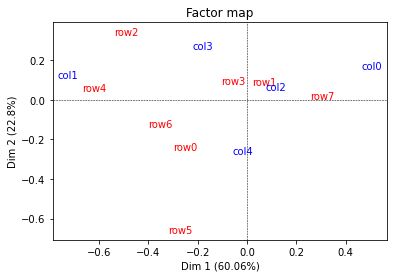

In [53]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
afc.mapping(num_x_axis=1, num_y_axis=2)

Les Etat-Unis et le Canada ont ont plus de plus nobles en Medecine et en Economie
la Grande bretagne et la France ont plus de prix nobels en paix
la France, l'Italie et la Grande bretagne ont plus de prix nobels ne littérature
L'Allemagne, la Russie et le Japon ont plus de prix nobels en Physique

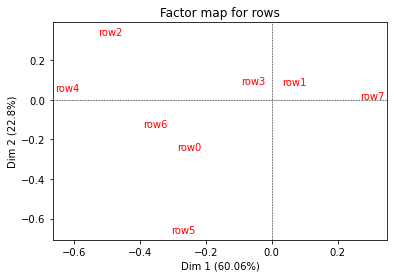

In [54]:
# Mapping des points lignes
afc.mapping_row(num_x_axis=1, num_y_axis=2)

La France, la Grande Bretagne et l'Italie ont assez de ressemblances en prix Nobels dans l'ensemble des matières;
Les Etat-Unis et le Canada ont assez de ressemblances en prix Nobels dans l'ensemble des matières;
Nous La Russie, le Japon et l'Allemagne ont assez de ressemblances en prix Nobels dans l'ensemble des matières;

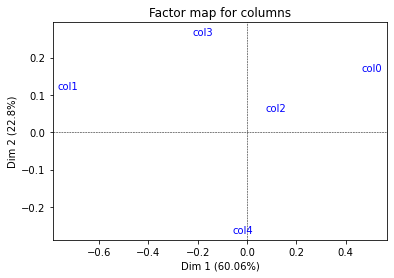

In [56]:
# Mapping des points colonnes
afc.mapping_col(num_x_axis=1, num_y_axis=2)

Les pays qui ont plus de prix Nobels en Economie et ont également plus de prix Nobels en Médecine
Les pays qui ont plus de prix Nobels en Littérature et ont également plus de prix Nobels en Paix

# Analyse du 1er axe - Points lignes

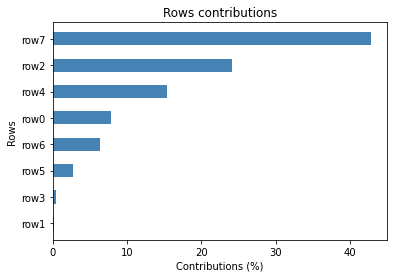

In [57]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
afc.plot_row_contrib(num_axis=1)

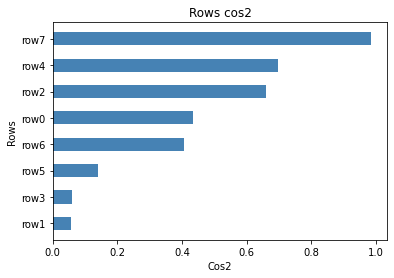

In [58]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
afc.plot_row_cos2(num_axis=1)

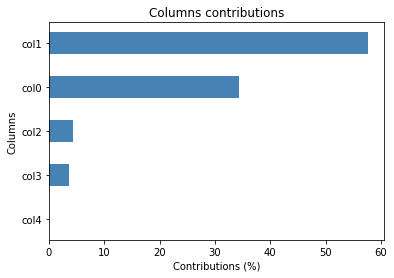

In [59]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
afc.plot_col_contrib(num_axis=1)

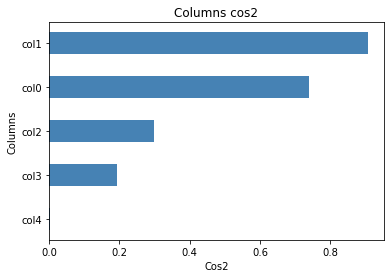

In [71]:
afc.plot_col_cos2(num_axis=1)

,Pays,Economie,Littérature,Medecine,Paix,Physique,Marge Colonne
0,Allemagne,1,8,18,5,24,56
1,Canada,3,2,4,1,4,14
2,France,3,11,12,10,9,45
3,GB,6,7,26,11,20,70
4,Italie,1,6,5,1,5,18
5,Japon,0,2,3,1,11,17
6,Russie,3,5,2,3,10,23
7,USA,43,8,70,19,66,206
8,Marge Ligne,60,49,140,51,149,449
